In [1]:
%run code/weight_correction

In [3]:
# wtlx = wtl1.reweighted_view(bb2)

CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 715 cells for fitting with e>35 & n>2


# Weight correction factor
For a presumably constant source $S_1$ with a variable neighbor $S_2$, I've
[derived](https://tburnett.github.io/wtlike/sources.html#Accounting-for-variations-from-neighboring-sources) the following:

$$w'_1 = \frac{w_1}{1+\alpha_2\ w_2}\ \ ,   $$
where  $w_1$ and $w_2$ are weights for a common pixel/band, and $\alpha_2$ is the source flux factor for $S_2$. 

We will test this, with $S_1$ as the pulsar PSR J0007+7303 and $S_2$ the AGN 4FGL J0019.6+7327. 
The separation is 1 deg.

<figure style="margin-left: 5%" title="Figure 1">   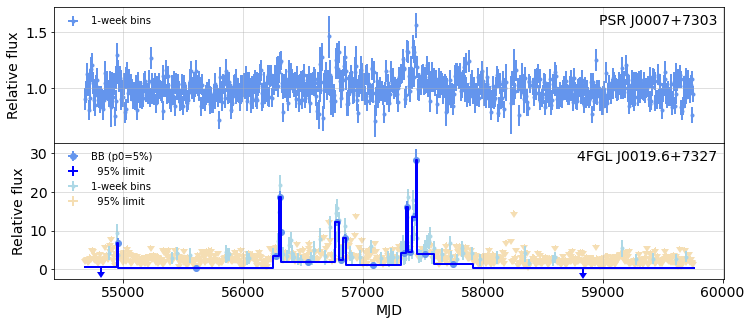  <figcaption><b>Figure 1</b>. Upper plot: the pulsar PSR J0007+7303; lower plot: Bayesian block output of the variable source.</figcaption></figure>


### Demonstrate the effect of applying the correction.

#### Before:




#### Long-term variability for PSR J0007+7303
<figure style="margin-left: 5%" title="Figure 1">   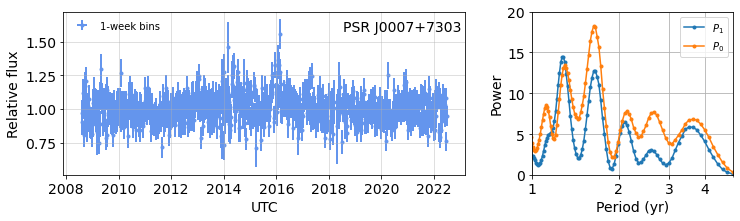 </figure>




#### After:

Applied correction to the pulsar PSR J0007+7303 from the nearby blazar 4FGL J0019.6+7327



CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 715 cells for fitting with e>35 & n>2


#### Long-term variability for PSR J0007+7303
<figure style="margin-left: 5%" title="Figure 1">   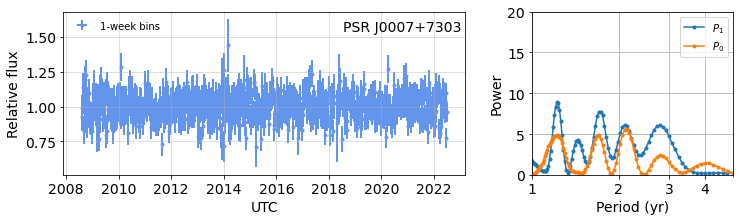 </figure>


So both $P_0$ and $P_1$ are now smaller, and the relative size seems to be reversed.
    


In [5]:
wc_demo()

In [6]:
cat = Fermi4FGL()
var_cut=50
name = S1
near_df = cat.select_cone(name, query=f'variability>{var_cut}')
near_df['name'] = near_df.index
df = near_df['name sep significance variability'.split()]
df

Loaded Fermi 4FGL-DR3 gll_psc_v28.fit: 6659 entries


,name,sep,significance,variability
name,,,,
4FGL J0019.6+7327,4FGL J0019.6+7327,0.9741,20.051662,428.932312


In [7]:
check_nearby('PKS 0208-512')

### Check PKS 0208-512 for nearby variable sources
<details  class="nbdoc-description" >  <summary> load 4FGL output </summary>  <div style="margin-left: 5%;"><pre>Loaded Fermi 4FGL-DR3 gll_psc_v28.fit: 6659 entries<br></pre></div> </details>

Display all within 5 deg of PKS 0208-512 with variability >50
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>name</th>
      <th>sep</th>
      <th>significance</th>
      <th>variability</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>4FGL J0158.5-5005</td>
      <td>2.158</td>
      <td>14.388</td>
      <td>252.091</td>
    </tr>
    <tr>
      <td>4FGL J0209.3-5228</td>
      <td>1.478</td>
      <td>65.952</td>
      <td>140.858</td>
    </tr>
    <tr>
      <td>4FGL J0210.7-5101</td>
      <td>0.005</td>
      <td>187.133</td>
      <td>11604.488</td>
    </tr>
    <tr>
      <td>4FGL J0231.2-4745</td>
      <td>4.658</td>
      <td>41.173</td>
      <td>1924.044</td>
    </tr>
  </tbody>
</table>


### Check the variable source 4FGL J0019.6+7327
<details  class="nbdoc-description" >  <summary> Set up WtLIke for 4FGL J0019.6+7327 </summary>  <div style="margin-left: 5%;"><pre>SourceData:  4FGL J0019.6+7327: Restoring from cache with key "P88Y0096_data"<br>SourceData: Source 4FGL J0019.6+7327 with:<br>	 data:       496,319 photons from 2008-08-04 to 2022-07-02<br>	 exposure: 4,379,566 intervals,  average effective area 3644 cm^2 for 131.0 Ms<br>	 rates:  source 1.21e-08/s, background 1.03e-06/s, TS 380.2<br>CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0<br>LightCurve: select 715 cells for fitting with e&gt;35 & n&gt;2<br>CellData.rebin: Bin photon data into 121896 1-hour bins from 54683.0 to 59762.0<br></pre></div> </details>

#### The light curve
<figure style="margin-left: 5%" title="Figure 1">   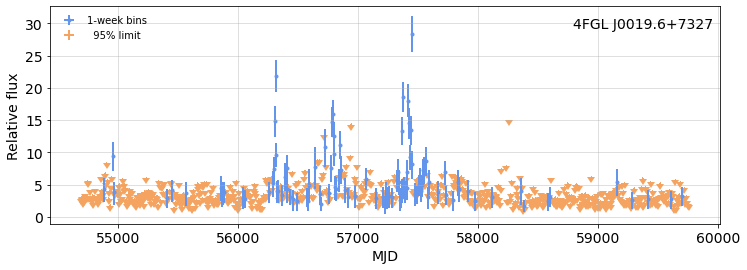 </figure>

#### and its periodogram

<figure style="margin-left: 5%" title="Figure 2">   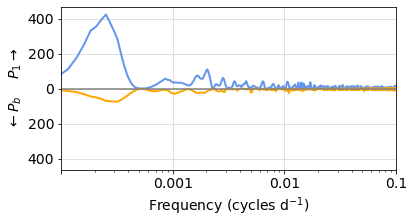 </figure>


In [8]:
wtl_b = wpm = None
@ipynb_doc
def study_variable(name):
    """
    ### Check the variable source {name}
    {out1}
    
    #### The light curve
    {fig1}
    
    #### and its periodogram

    {fig2}
    """
    global wtl_b, wpm
    with capture_hide(f'Set up WtLIke for {name}') as out1:
        wtl_b = WtLike(name)
        wpm = wtl_b.periodogram()
    fig1 = wtl_b.plot()
    fig2, ax2 = plt.subplots(figsize=(6,3))
    wpm.power_plot(ax=ax2, xscale='log', xlim=(1e-4, 0.1))
    return locals()

near_name = near_df.iloc[0].name
ww = study_variable(near_name)

array([0.28065777, 0.71865777])

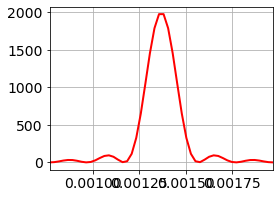

In [92]:

# class Sinc():
#     """ A functor for the function sinc(x)**2.
#     """
#     def __init__(self, A, freq, delf):
#         """
#         * A amplitude
#         * freq frequency
#         * delf -- frequency delta = 1/T 
#         """
#         self.A, self.freq, self.delf = A,freq, delf
#         self.sincsq =  lambda x: A*np.sinc((x-freq)/delf)**2 
        
#     def __call__(self, x):
#         return self.sincsq(x)
    
#     def lim(self, f=3):
#         return  (self.freq-f*self.delf, self.freq+f*self.delf) 
    
#     def plot(self, xlim=None, ax=None, pticks=None, **kwargs):
#         """Make a power vs. frequency plot
        
#         - xlim : tuple(fmin,fmax) | None -- plot xlim. If None, center on peak,
#                 range 6x width
#         - pticks : if specified, ticks for upper period scale
#         """
#         xlim = self.lim() if  xlim is None else xlim
#         x = np.linspace(*xlim)
#         fig, ax = plt.subplots(figsize=(4,3)) if ax is None else (ax.figure, ax)
#         ax.plot(x, self.sincsq(x),  **kwargs)
#         ax.set(xlim=xlim, )
#         ax.grid(0.5)
        
#         if pticks is None: return
#         a,b = np.array(xlim)
#         x2 = lambda p: (1/p-a)/(b-a)
#         ax.twiny().set(xlabel='Period',
#                 xticks=x2(np.array(pticks)), 
#                 xticklabels=[ f'{t}' for t in pticks])  
        
over = Sinc(2e3, 0.5, 0.01)
over = Sinc(2e3, 0.5/365.25, 1/5000)
over.plot(color='red',  lw=2)
365*(np.array(over.lim()))

In [34]:
wtl = WtLike('PKS 0208-512')#name, time_bins=time_bins) if type(name)==str else name
name = wtl.source.name
pgm = wtl.periodogram()
pgm.power_spectrum();

SourceData:  PKS 0208-512: Restoring from cache with key "P88Y0521_data"
SourceData: Source PKS 0208-512 with:
	 data:       117,312 photons from 2008-08-04 to 2022-07-02
	 exposure: 3,327,323 intervals,  average effective area 3472 cm^2 for 99.4 Ms
	 rates:  source 1.06e-07/s, background 2.34e-07/s, TS 58225.7
CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 717 cells for fitting with e>35 & n>2
CellData.rebin: Bin photon data into 121896 1-hour bins from 54683.0 to 59762.0


,f,p0,p1,pb
0,0.000023,795.615417,533.682983,296.233002
1,0.000046,1477.938599,1051.953857,459.344543
2,0.000069,5165.554688,3921.615479,1267.780396
3,0.000092,5289.847656,3768.738037,1619.749268
4,0.000114,5367.691895,3777.097412,1744.864746
...,...,...,...,...
262139,5.999908,1.673707,2.683636,0.458106
262140,5.999931,0.753745,1.348416,0.534420
262141,5.999954,0.167924,0.366930,0.577829
262142,5.999977,0.078099,0.003096,0.587492


In [90]:
def lowfreqplot(pgm, ax=None, over=None, pticks=[1,1.5,2,4,8],**kwargs):
    
    fig, ax = plt.subplots(figsize=(5,3)) if ax is None else (ax.figure, ax)
    yr = 365.25
    df = pgm.power_df.query('f<0.0028').copy()
    # fig2, ax = plt.subplots(figsize=(4,3))
    x = df.f*yr
    ax.plot(x, df.p1, '.-', label='periodogram')
    kw = dict(xlabel='Frequency $yr^{-1})$', ylabel='Power $p_1$')
    kw.update(kwargs)
    ax.set(**kw)
    ax.grid()
    
    if over is not None:
        lims = dict(xlim=ax.get_xlim(), ylim= ax.get_ylim())
        over.plot(ax=ax, color='r', ls='--',label='sinc overlay')
        ax.set(**lims)

    # ax.legend(fontsize=10)
    if pticks is None: return
    a,b = np.array(ax.get_xlim())
    x2 = lambda p: (1/p-a)/(b-a)
    ax.twiny().set(xlabel='Period (yr)',xlim=(0,1),
            xticks=x2(np.array(pticks)), 
            xticklabels=[ f'{t}' for t in pticks]) 
    ax.legend(fontsize=10)


array([102.51025, 262.48975])

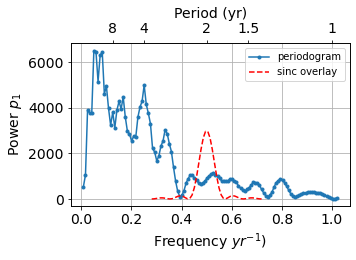

In [91]:
fig, ax = plt.subplots(figsize=(5,3))
over=Sinc(3e3, 0.5, 365.25/5000);
#over.plot(ax=ax)

lowfreqplot(pgm, ax=ax, over=over);
365*(np.array(over.lim()))

In [82]:
over.plot(ax=ax)

In [17]:
@ipynb_doc
def variability_plots(name, time_bins=(0,0,7), tsamp=1/24, pmax=None ):
    """
    #### Long-term variability for {name}
    {fig1}
    
    """
    with capture_hide('Setup output') as txt:
        wtl = WtLike(name, time_bins=time_bins) if type(name)==str else name
        name = wtl.source.name
        pgm = wtl.periodogram(tsamp=tsamp)
        pgm.power_spectrum()
        
    def left(ax):
        wtl.plot(ax=ax, UTC=True)    
    
    def right(ax):
        lowfreqplot(pgm, ax=ax, over=Sinc(3000, 1e-3, 1/5000)
#         df = pgm.power_df.query( '5e-4< f<0.003').copy()
#         df.loc[:,'period'] = 1/df.f/365.25

#         ax.plot(df.period, df.p1, '.-', label='$P_1$')
#         ax.plot(df.period, df.p0, '.-', label='$P_0$')
#         ax.set(xlabel='Period (yr)', xscale='log', 
#             xlim=(1,5),ylabel='Power', ylim=(0,pmax),
#             xticks=[1,2,3,4], xticklabels='1 2 3 4'.split())
#         ax.grid()
#         ax.legend(fontsize=10)
        
    fig1 = plt.figure(figsize=(12,3))
    fig1.subplots_adjust(wspace=0)
    gs = plt.GridSpec(1,10)
    left(  fig1.add_subplot(gs[:6]) )
    right( fig1.add_subplot(gs[7:]) )
    return locals()

SourceData:  PKS 0208-512: Restoring from cache with key "P88Y0521_data"
SourceData: Source PKS 0208-512 with:
	 data:       117,312 photons from 2008-08-04 to 2022-07-02
	 exposure: 3,327,323 intervals,  average effective area 3472 cm^2 for 99.4 Ms
	 rates:  source 1.06e-07/s, background 2.34e-07/s, TS 58225.7
CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 717 cells for fitting with e>35 & n>2


#### Long-term variability for PKS 0208-512
<figure style="margin-left: 5%" title="Figure 1">   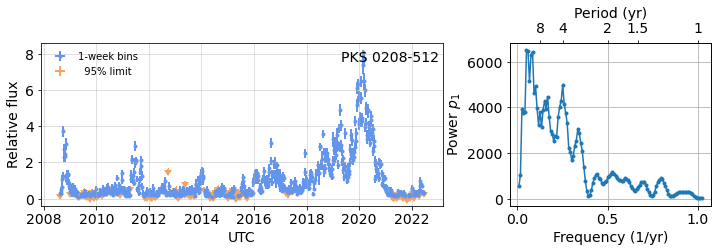 </figure>


In [18]:
variability_plots(WtLike('PKS 0208-512'))

#### Long-term variability for 4FGL J0019.6+7327
<figure style="margin-left: 5%" title="Figure 1">   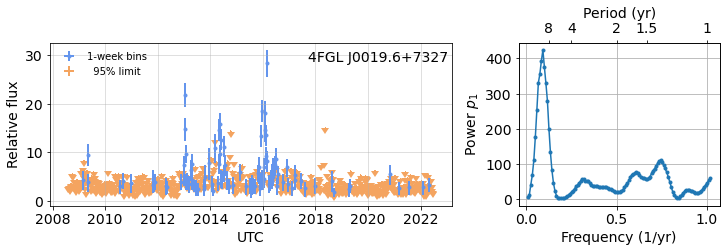 </figure>


In [19]:
variability_plots('4FGL J0019.6+7327')

#### Long-term variability for 4FGL J0019.6+7327
<figure style="margin-left: 5%" title="Figure 1">   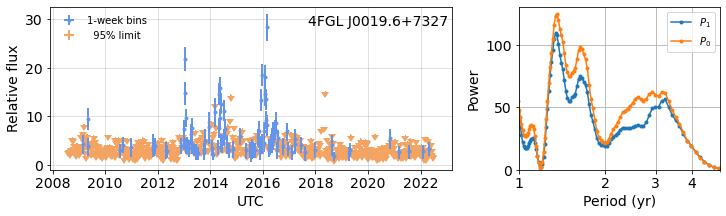 </figure>


In [10]:
variability_plots('4FGL J0019.6+7327')